In [1]:
pip install pyforest

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pyforest

In [3]:
# The dataset consists of 303 individuals data. There are 14 columns in the dataset, which are described below.

#     Age: displays the age of the individual.
#     Sex: displays the gender of the individual using the following format :
#     1 = male
#     0 = female
#     Chest-pain type: displays the type of chest-pain experienced by the individual using the following format :
#     1 = typical angina
#     2 = atypical angina
#     3 = non — anginal pain
#     4 = asymptotic
#     Resting Blood Pressure: displays the resting blood pressure value of an individual in mmHg (unit)
#     Serum Cholestrol: displays the serum cholesterol in mg/dl (unit)
#     Fasting Blood Sugar: compares the fasting blood sugar value of an individual with 120mg/dl.
#     If fasting blood sugar > 120mg/dl then : 1 (true)
#     else : 0 (false)
#     Resting ECG : displays resting electrocardiographic results
#     0 = normal
#     1 = having ST-T wave abnormality
#     2 = left ventricular hyperthrophy
#     Max heart rate achieved : displays the max heart rate achieved by an individual.
#     Exercise induced angina :
#     1 = yes
#     0 = no
#     ST depression induced by exercise relative to rest: displays the value which is an integer or float.
#     Peak exercise ST segment :
#     1 = upsloping
#     2 = flat
#     3 = downsloping
#     Number of major vessels (0–3) colored by flourosopy : displays the value as integer or float.
#     Thal : displays the thalassemia :
#     3 = normal
#     6 = fixed defect
#     7 = reversible defect
#     Diagnosis of heart disease : Displays whether the individual is suffering from heart disease or not :
#     0 = absence
#     1, 2, 3, 4 = present.

In [4]:
df = pd.read_csv('heart.csv')

<IPython.core.display.Javascript object>

In [5]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [6]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [7]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [9]:
df.shape

(303, 14)

In [10]:
df.describe().style.background_gradient(cmap = 'RdYlGn')

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [11]:
df.isnull()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,False,False,False,False,False,False,False,False,False,False,False,False,False,False
299,False,False,False,False,False,False,False,False,False,False,False,False,False,False
300,False,False,False,False,False,False,False,False,False,False,False,False,False,False
301,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [12]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<AxesSubplot:>

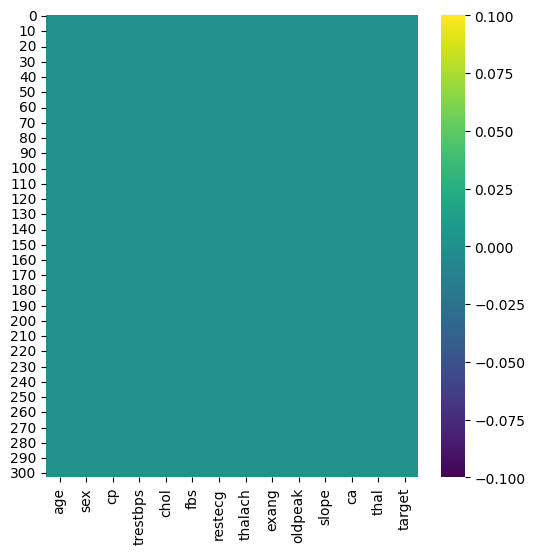

In [13]:
plt.figure(figsize=(6,6))
sns.heatmap(df.isnull() , cmap='viridis')

In [14]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [15]:
df['age'].value_counts(ascending = True)

77     1
76     1
74     1
29     1
37     2
34     2
38     3
40     3
69     3
71     3
70     4
68     4
39     4
35     4
47     5
49     5
50     7
66     7
48     7
46     7
53     8
65     8
45     8
42     8
43     8
55     8
61     8
67     9
63     9
41    10
64    10
44    11
60    11
56    11
62    11
51    12
52    13
59    14
54    16
57    17
58    19
Name: age, dtype: int64

In [16]:
df['sex'].value_counts()

1    207
0     96
Name: sex, dtype: int64

In [17]:
df['cp'].value_counts()                    ##'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       ##'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target

0    143
2     87
1     50
3     23
Name: cp, dtype: int64

In [18]:
df['chol'].value_counts()

204    6
197    6
234    6
269    5
254    5
      ..
284    1
224    1
167    1
276    1
131    1
Name: chol, Length: 152, dtype: int64

In [19]:
df['trestbps'].value_counts()

120    37
130    36
140    32
110    19
150    17
138    13
128    12
160    11
125    11
112     9
132     8
118     7
124     6
135     6
108     6
152     5
134     5
145     5
122     4
170     4
100     4
105     3
126     3
115     3
180     3
136     3
142     3
102     2
148     2
178     2
94      2
144     2
146     2
200     1
114     1
154     1
123     1
192     1
174     1
165     1
104     1
117     1
101     1
156     1
106     1
155     1
129     1
172     1
164     1
Name: trestbps, dtype: int64

In [20]:
df['fbs'].value_counts()

0    258
1     45
Name: fbs, dtype: int64

In [21]:
df['restecg'].value_counts()

1    152
0    147
2      4
Name: restecg, dtype: int64

In [22]:
df['thalach'].value_counts()

162    11
160     9
163     9
152     8
173     8
       ..
202     1
184     1
121     1
192     1
90      1
Name: thalach, Length: 91, dtype: int64

In [23]:
df['exang'].value_counts()

0    204
1     99
Name: exang, dtype: int64

In [24]:
df['oldpeak'].value_counts()

0.0    99
1.2    17
1.0    14
0.6    14
1.4    13
0.8    13
0.2    12
1.6    11
1.8    10
0.4     9
2.0     9
0.1     7
2.8     6
2.6     6
1.5     5
3.0     5
1.9     5
0.5     5
3.6     4
2.2     4
2.4     3
0.9     3
3.4     3
4.0     3
0.3     3
2.3     2
3.2     2
2.5     2
4.2     2
1.1     2
3.1     1
0.7     1
3.5     1
6.2     1
1.3     1
5.6     1
2.9     1
2.1     1
3.8     1
4.4     1
Name: oldpeak, dtype: int64

In [25]:
df['slope'].value_counts()

2    142
1    140
0     21
Name: slope, dtype: int64

In [26]:
df['ca'].value_counts()

0    175
1     65
2     38
3     20
4      5
Name: ca, dtype: int64

In [27]:
df['thal'].value_counts()

2    166
3    117
1     18
0      2
Name: thal, dtype: int64

In [28]:
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='target', ylabel='count'>

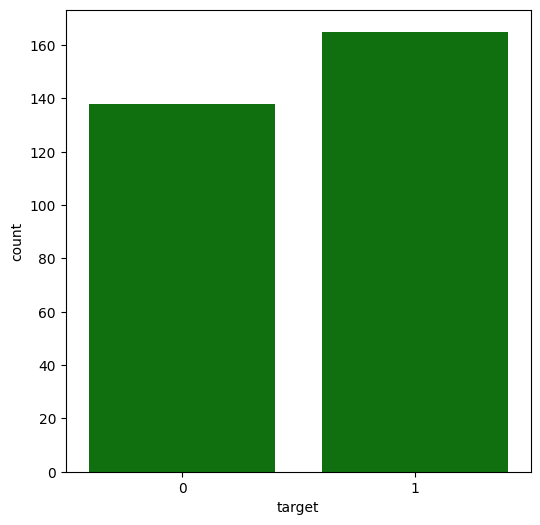

In [29]:
plt.figure(figsize=(6,6))
sns.countplot(x = df['target'] , data=df , color='green')

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='fbs', ylabel='count'>

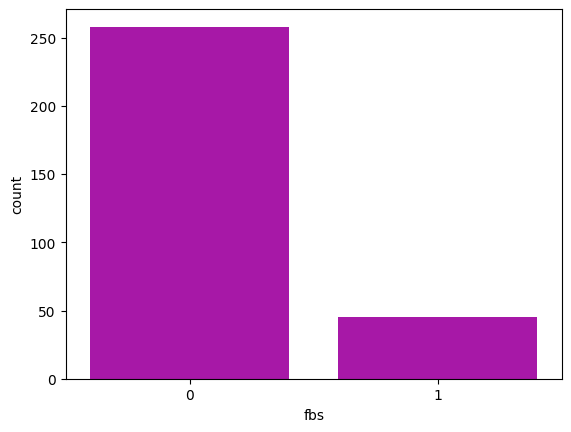

In [30]:
sns.countplot(x=df['fbs'] , data=df , color='m')

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='slope', ylabel='count'>

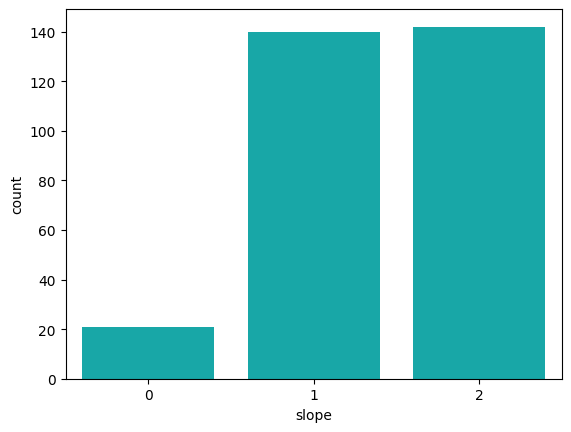

In [31]:
sns.countplot(x = df['slope'] , data=df , color='c'  , orient='vertical')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='age', ylabel='count'>

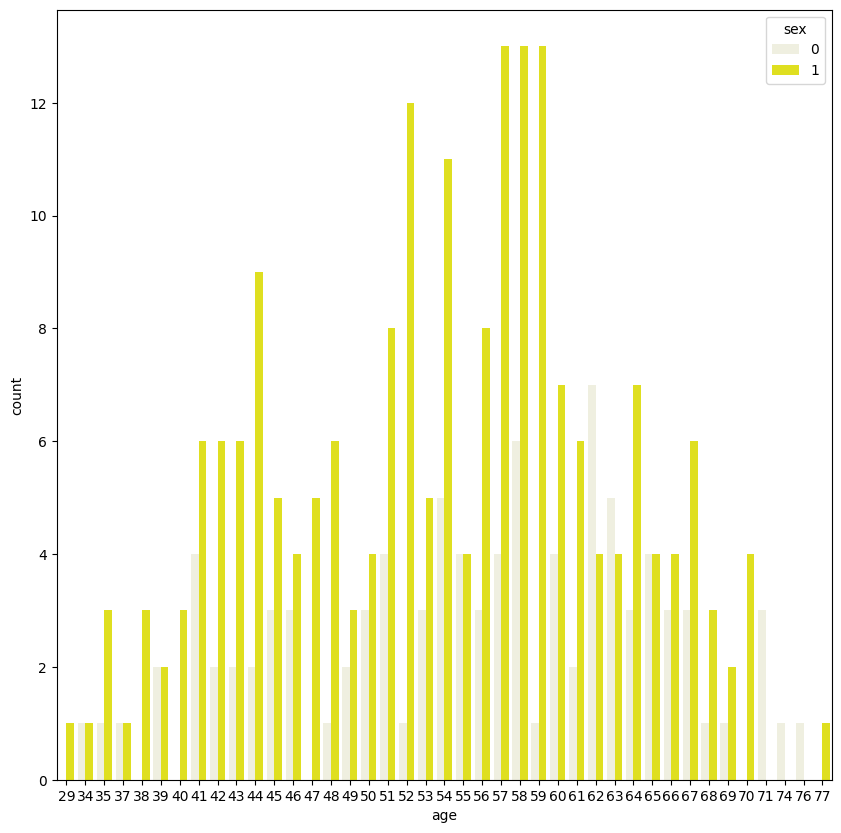

In [32]:
plt.figure(figsize=(10,10))
sns.countplot(x = df['age'] , hue='sex' , data = df , color = 'yellow', width=0.8 )

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='sex', ylabel='count'>

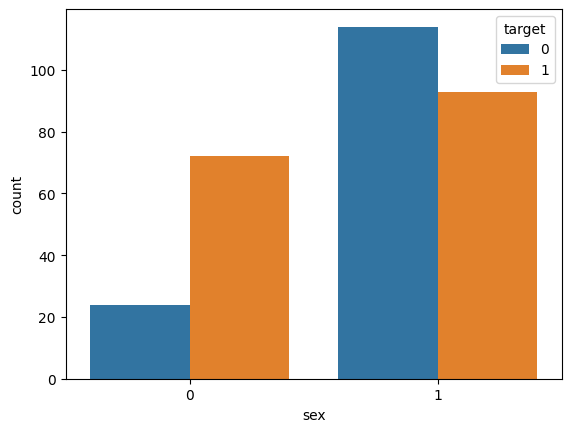

In [33]:
sns.countplot(x=df["sex"],data=df,hue="target")

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='ca', ylabel='count'>

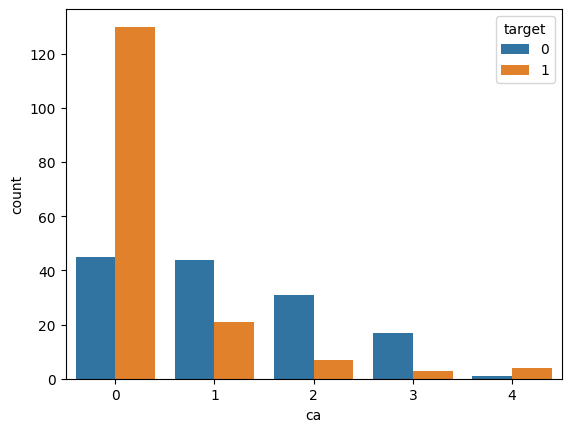

In [34]:
sns.countplot(x = df['ca'] , hue = 'target' , data=df)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='age', ylabel='count'>

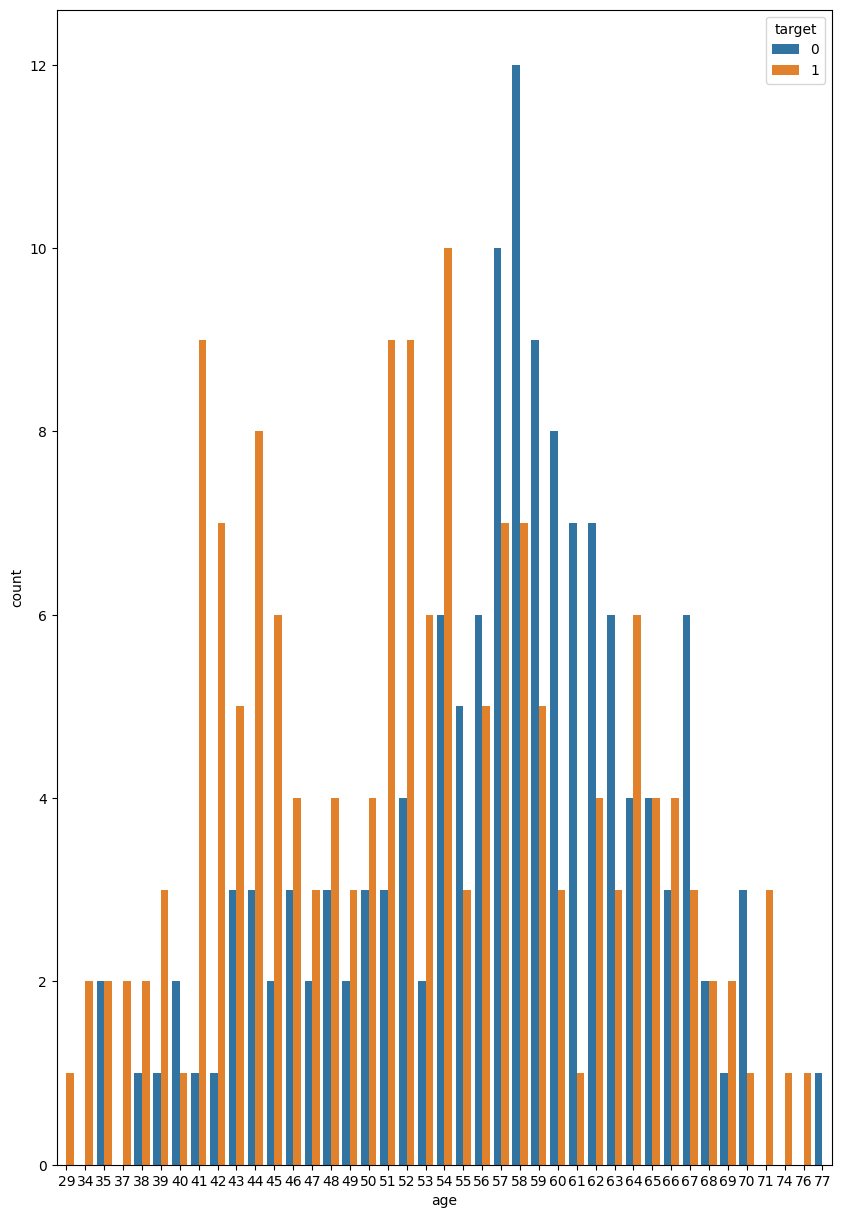

In [35]:
plt.figure(figsize=(10,15))
sns.countplot(x = df['age'] , hue = 'target' , data=df)


<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='exang', ylabel='trestbps'>

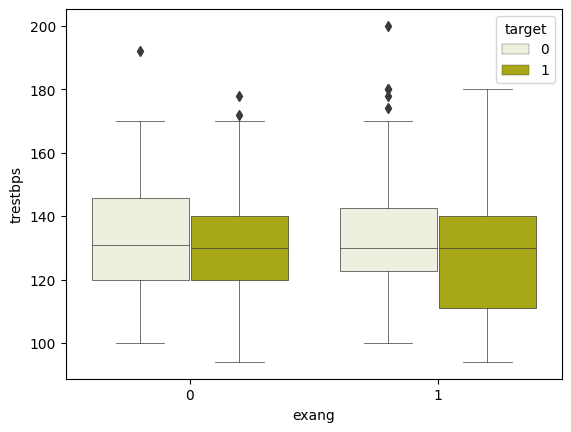

In [36]:
sns.boxplot(data=df  , x = df['exang'] , y = df['trestbps'] , hue='target' ,color = 'y' , linewidth=0.5)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

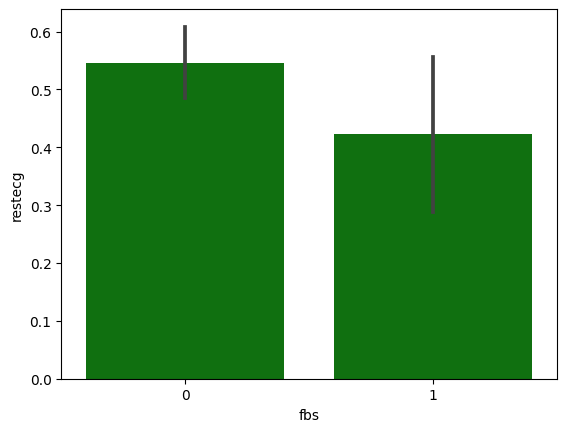

In [37]:
sns.barplot(data=df , x = df['fbs'] , y = df['restecg'] , color='g')
plt.show()

<IPython.core.display.Javascript object>

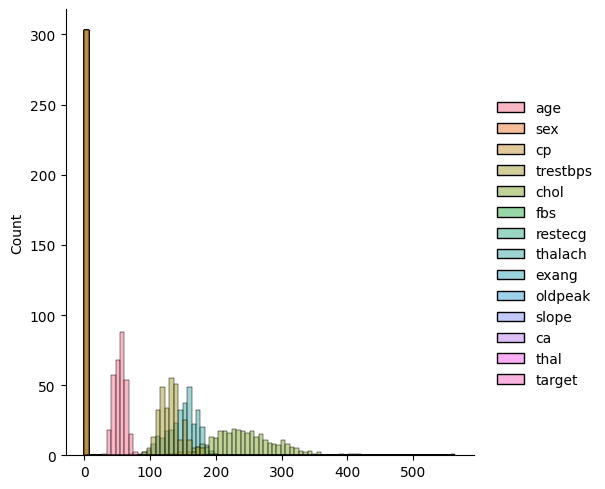

In [38]:
sns.displot(df)

<IPython.core.display.Javascript object>

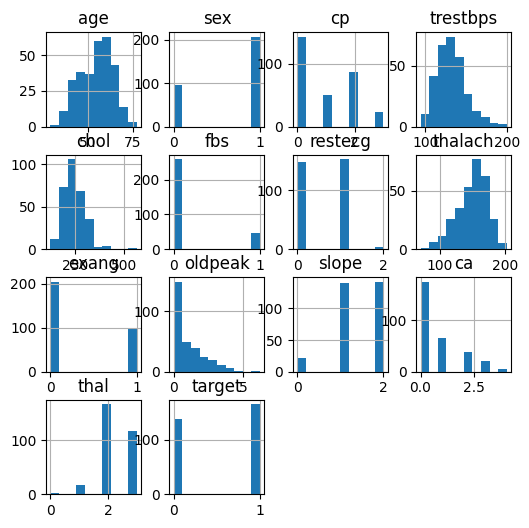

In [39]:
df.hist(figsize=(6,6))
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 600x600 with 0 Axes>

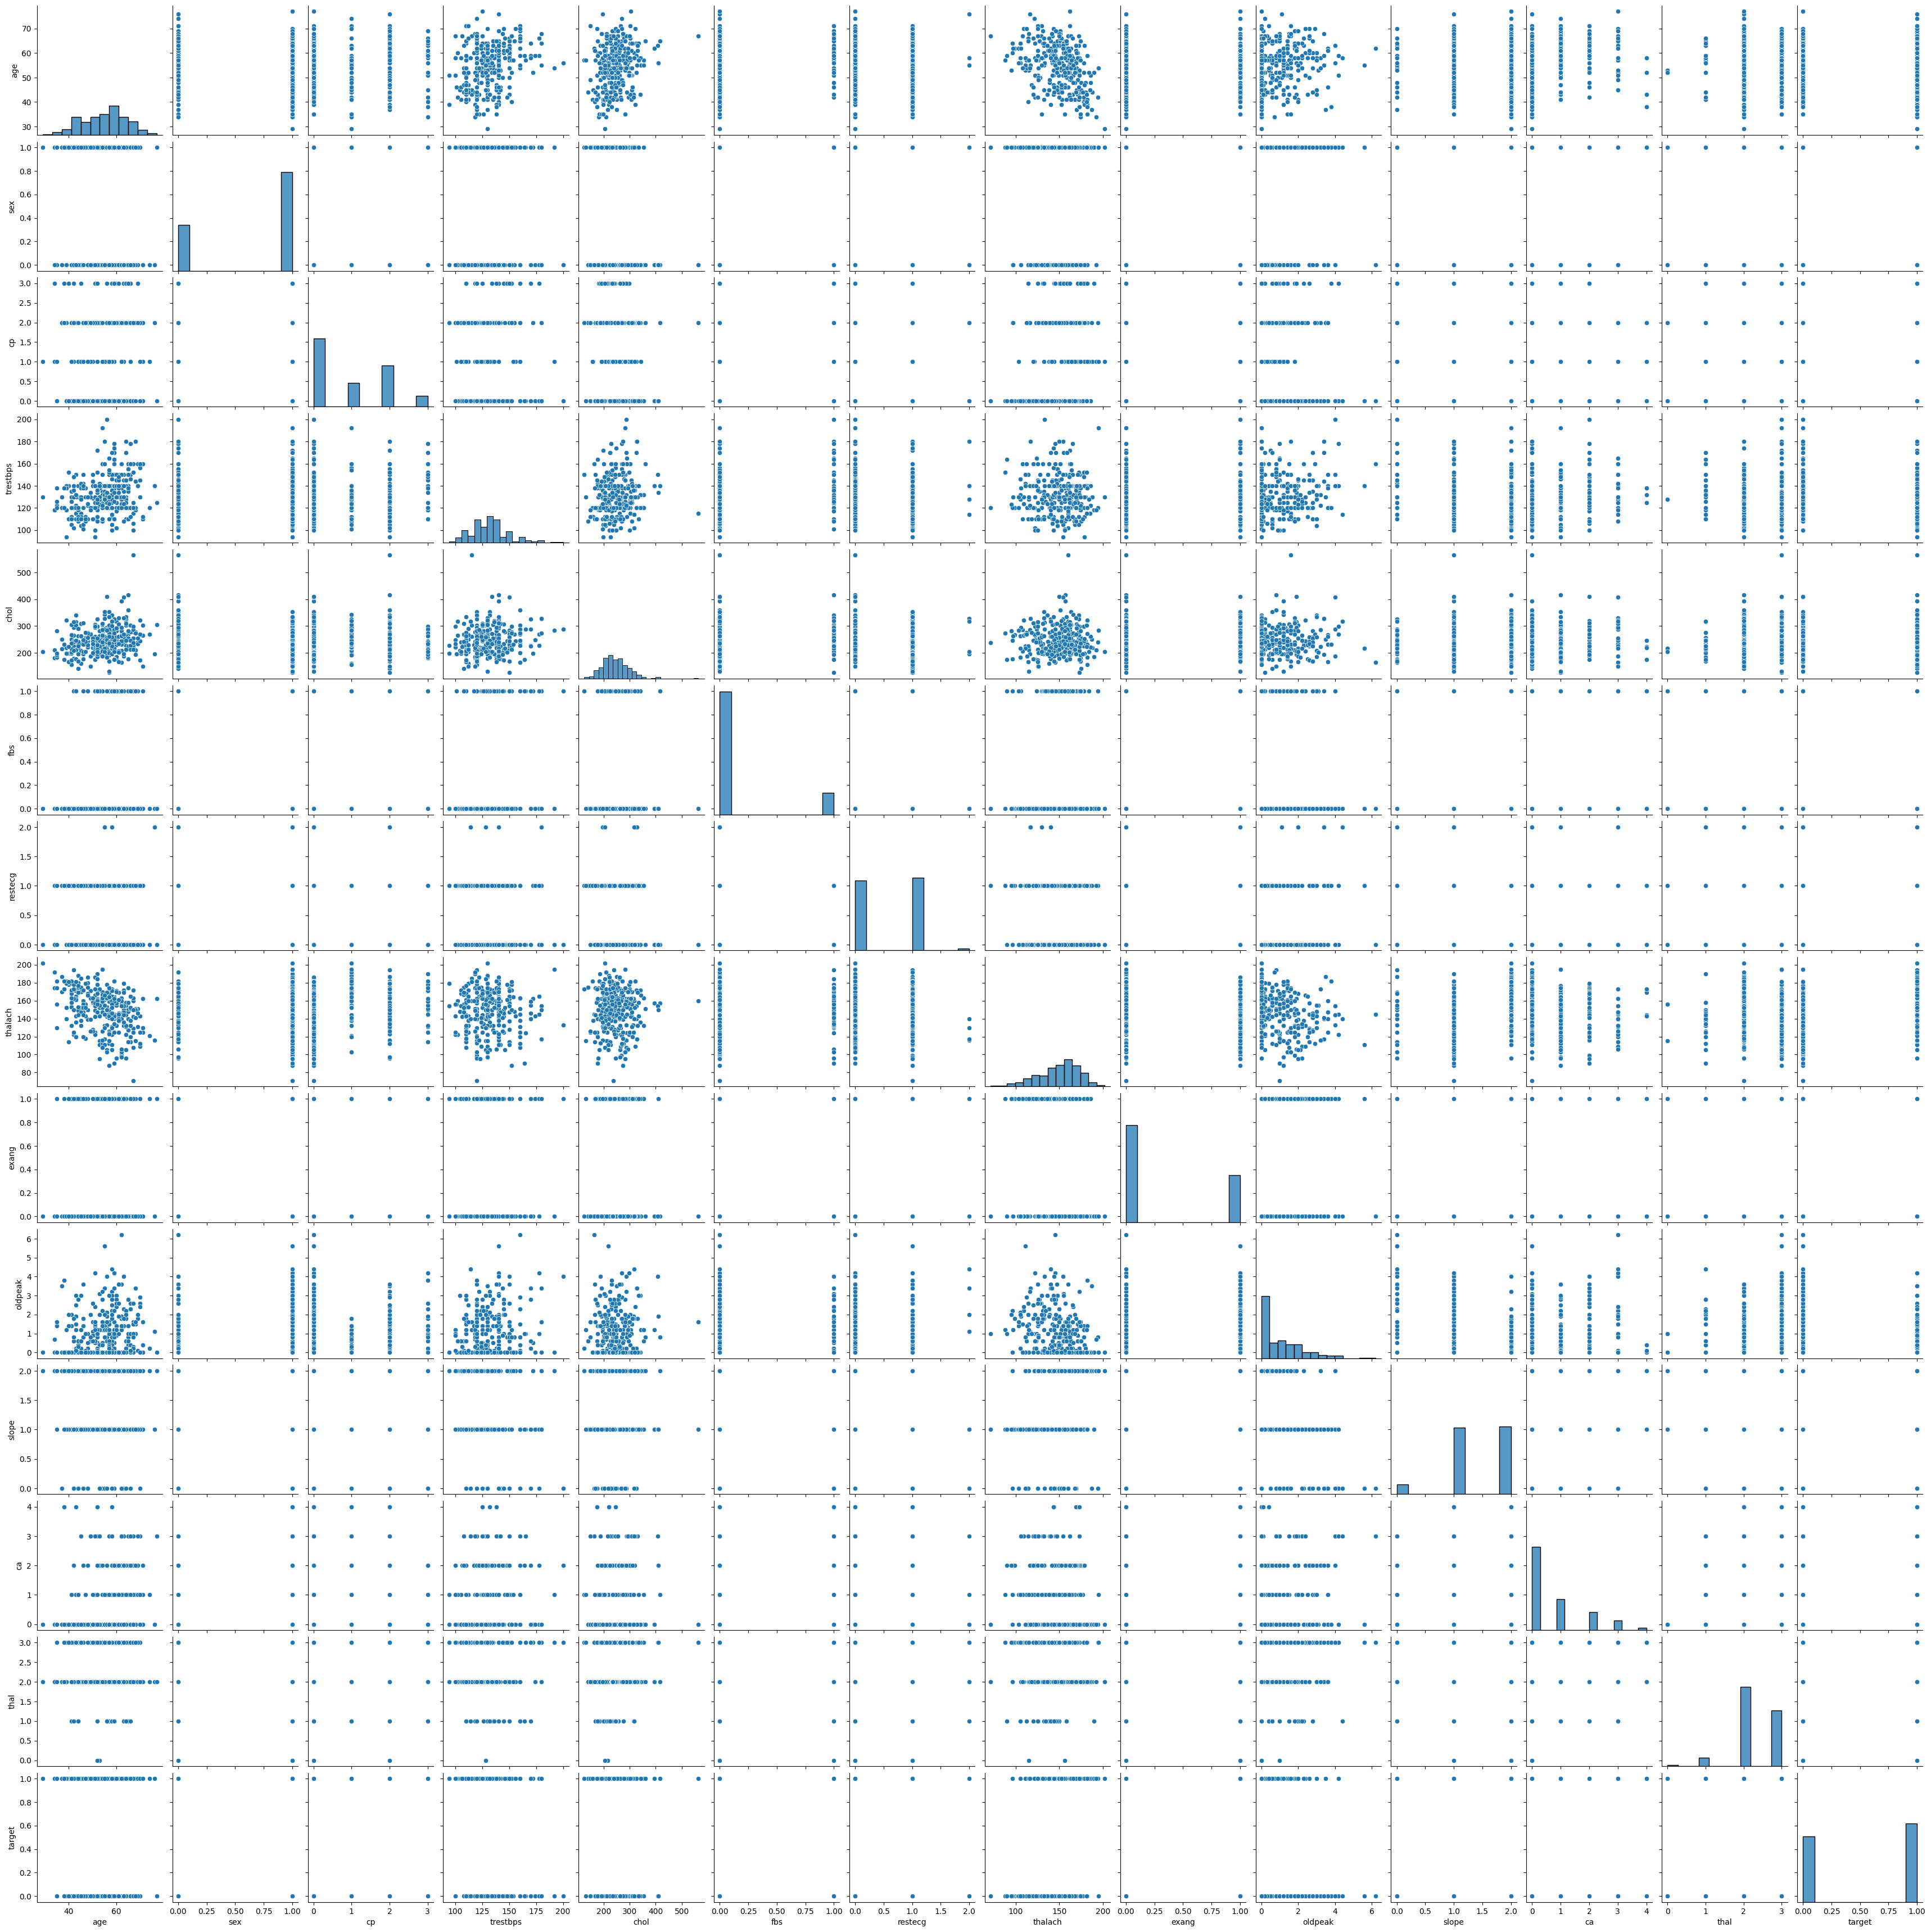

In [40]:
plt.figure(figsize=(6,6))
sns.pairplot(df)

In [41]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<AxesSubplot:>

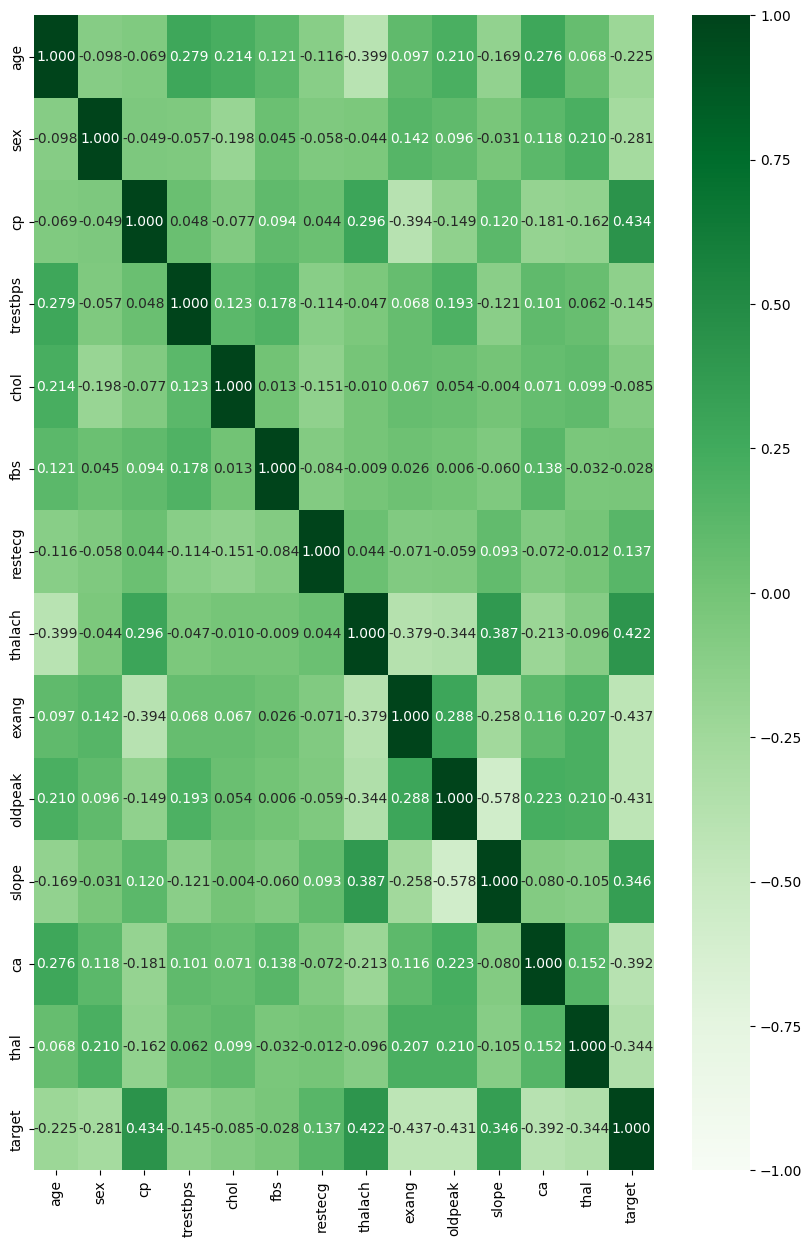

In [42]:
plt.figure(figsize=(10,15))
sns.heatmap(df.corr(), vmin=-1 , vmax=1 , annot=True, cmap='Greens' ,fmt = '.3f' )

In [43]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [44]:
x.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object')

In [45]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [46]:
y.value_counts()

1    165
0    138
Name: target, dtype: int64

## Split Dataset Into Train and Test

In [47]:
from sklearn.model_selection import train_test_split
x_train, x_test,y_train , y_test = train_test_split(x,y , test_size=0.20 , random_state=42)

In [48]:
print(x_train.shape)
print(x_test.shape)

(242, 13)
(61, 13)


In [49]:
print(y_train.shape)
print(y_test.shape)

(242,)
(61,)


## Feature Scaling   . Standardrizatoin 

In [50]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(x_train)
x_train = sc.transform(x_train)
x_test  = sc.transform(x_test)

## Build Model 

In [51]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(x_train , y_train)
    

KNeighborsClassifier()

In [52]:
knn.score(x_test , y_test)

0.9016393442622951

In [53]:
y_pred = knn.predict(x_test)
x_pred = knn.predict(x_train)

In [54]:
y_pred

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [55]:
x_pred

array([1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1])

In [56]:
from sklearn.metrics import accuracy_score
print("Accuracy on traning" , accuracy_score(x_pred , y_train))
a_train = accuracy_score(x_pred , y_train)



print("Accuracy on testing", accuracy_score(y_pred ,y_test ))
b_test = accuracy_score(y_pred , y_test)

Accuracy on traning 0.8553719008264463
Accuracy on testing 0.9016393442622951


In [57]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

cm = confusion_matrix(y_test , y_pred)
print("Confusion_matrix")
print(cm)



cr = classification_report(y_test,y_pred)
print("Classification_report")
print(cr)

Confusion_matrix
[[27  2]
 [ 4 28]]
Classification_report
              precision    recall  f1-score   support

           0       0.87      0.93      0.90        29
           1       0.93      0.88      0.90        32

    accuracy                           0.90        61
   macro avg       0.90      0.90      0.90        61
weighted avg       0.90      0.90      0.90        61



In [58]:
data = [['knn' , a_train , b_test]]
df1 = pd.DataFrame(data , columns = [['Model' , 'Accuracy_train' , 'Accuracy_test']])

<IPython.core.display.Javascript object>

In [59]:
df1.head()

,Model,Accuracy_train,Accuracy_test
0,knn,0.855372,0.901639


In [60]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


## Model Prediction

In [61]:
x_sample = np.array([[63 ,1 ,3 ,145 ,233 ,1 ,0 ,150 ,0 ,2.3 ,0 ,0 ,1 ], [57 ,0 ,1 ,130 ,236 ,0 ,0 ,174 ,0 ,0.0 ,1 ,1 ,2 ],
                    [45 ,1 ,3 ,110 ,264 ,0 ,1 ,132 ,0 ,1.2 ,1 ,0 ,3 ]])
sc.fit(x_sample)
x_sample = sc.transform(x_sample)

x_sample 

<IPython.core.display.Javascript object>

array([[ 1.06904497,  0.70710678,  0.70710678,  1.16247639, -0.81182818,
         1.41421356, -0.70710678, -0.11624764,  0.        ,  1.20661485,
        -1.41421356, -0.70710678, -1.22474487],
       [ 0.26726124, -1.41421356, -1.41421356,  0.11624764, -0.59693249,
        -0.70710678, -0.70710678,  1.27872403,  0.        , -1.24210352,
         0.70710678,  1.41421356,  0.        ],
       [-1.33630621,  0.70710678,  0.70710678, -1.27872403,  1.40876067,
        -0.70710678,  1.41421356, -1.16247639,  0.        ,  0.03548867,
         0.70710678, -0.70710678,  1.22474487]])

In [62]:
x_sample.shape

(3, 13)

In [63]:
prediction = knn.predict(x_sample)

In [64]:
print(prediction)

[1 1 0]


In [65]:
##  target value 

##     1    165
##     0    138

## 1 value has Heart Diseases
## 0 value has No Heart Diseaes

In [66]:
if (prediction[0]==1):
    print('value has  Heart Diseaes')
else:
    print('value has No Heart Diseases')

value has  Heart Diseaes


## Save Model

## Joblib 

In [67]:
import joblib
joblib.dump(knn , 'model_save1')
model1 = joblib.load('model_save1')
model1.predict(x_sample)


array([1, 1, 0])